# Analyse one recording 

In [7]:
import numpy as np
from tqdm import tqdm
import librosa
import librosa.display
import librosa.util
import matplotlib.pyplot as plt

## Global settings
__Important:__ These settings have to match the ones in the STM32 application.

In [8]:
# Sampling
sampling_freq = 48000 # kHz 
n_stft_columns = 32 # How many columns for the short time fourier transformation
frame_size = 512*n_stft_columns + 512 # For one spectrogram column 1024 samples are needed
n_frames = 30 # How many frames were recorded

# Realtime audio preprocessing
n_mels = 30 # Resolution (bins) of one stft column
n_fft = 1024 # Size for one fft
hop_length = 512 # Jumps between fft windows
fmin = 4000 # Lowest bin for the columns
top_db = 80

## Import and convert the data

In [9]:
signal, _ = librosa.load('recording.WAV', sr=sampling_freq, mono=True, dtype=np.float32)

print("signal length: ", len(signal))

signal length:  506880


## Slice the data

In [10]:
signal_framed = []

# Iteratate over recording and create frames
for k  in range(n_frames):
    frame = signal[k*frame_size:(k+1)*frame_size]
    signal_framed.append(np.transpose(frame))
    
# Convert into numpy array
signal_framed = np.asarray(signal_framed)

print("signal_framed shape: ", signal_framed.shape)

signal_framed shape:  (30, 16896)


## Preprocess the data into LogMel spectrograms

In [11]:
# Spectograms of frames which will be the feautures for the neural network
signal_features = []

for frame in tqdm(signal_framed):
    # Create a mel-scaled spectrogram
    S_mel = librosa.feature.melspectrogram(y=frame, sr=sampling_freq, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, center=False, fmin=fmin)
    # Scale according to reference power
    S_mel = S_mel / S_mel.max()
    # Convert to dB
    S_log_mel = librosa.power_to_db(S_mel, top_db=top_db)
    signal_features.append(S_log_mel)

# Convert into numpy array
signal_features = np.asarray(signal_features)

print("signal_features shape: ", signal_features.shape)

100%|██████████| 30/30 [00:00<00:00, 238.80it/s]

signal_features shape:  (30, 30, 32)


## Plot a LogMel spectrogram of a frame

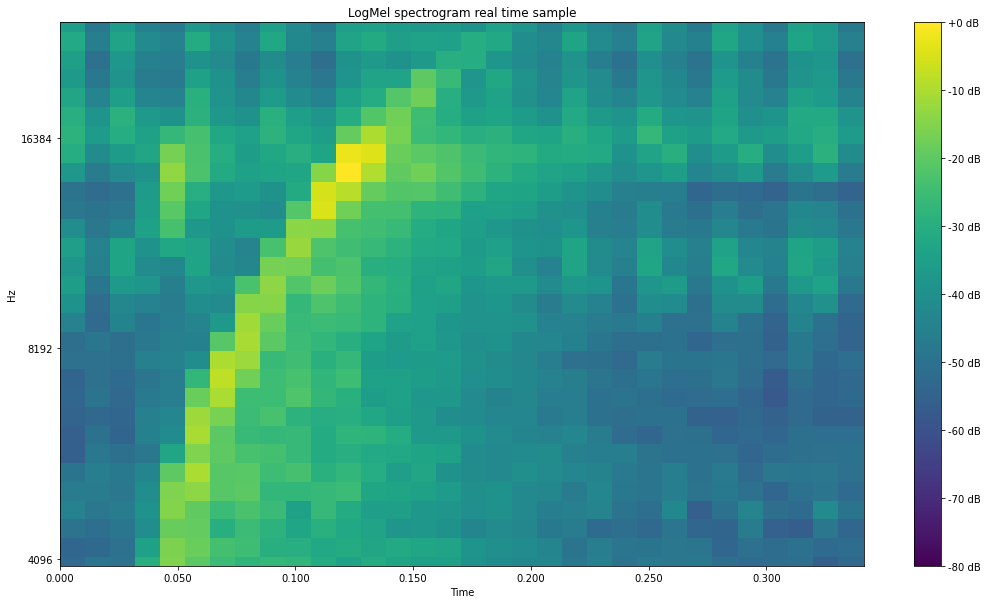

In [15]:
# Choose a frame to plot
frame_number = 18

plt.figure(figsize=(18, 10))
librosa.display.specshow(signal_features[frame_number,:, :], sr=sampling_freq, y_axis='mel',fmin=fmin,  fmax=24000,
                         x_axis='time', cmap='viridis', vmin=-top_db)
plt.colorbar(format='%+2.0f dB')
plt.title('LogMel spectrogram real time sample')
plt.show()